In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os
from collections import defaultdict
import time
# import logging

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from registration_utilities import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
atlas_name = 'atlasV4'

In [4]:
classifier_setting = 38
warp_setting = 8
# trial_idx = 0

In [6]:
parameters_allLandmarks_allStacks = defaultdict(dict)
subject_centroid_allLandmarks_allStacks = defaultdict(dict)

for name_s in all_known_structures_sided:
#     for stack in all_nissl_stacks:
    for stack in ['MD635']:

#         local_transformed_moving_structure_vol = \
#             DataManager.load_transformed_volume(stack_m=stack_moving, stack_f=stack_fixed,
#                                                 classifier_setting_m=classifier_setting,
#                                                 classifier_setting_f=classifier_setting,
#                                                 warp_setting=warp_setting,
#                                                 trial_idx=0,
#                                                 structure=structure)
        try:
            local_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
            DataManager.load_alignment_parameters(stack_f=stack, stack_m=atlas_name,
                                                 classifier_setting_m=classifier_setting,
                                                 classifier_setting_f=classifier_setting,
                                                 warp_setting=warp_setting,
                                                  trial_idx=None,
                                                  param_suffix=name_s)

            parameters_allLandmarks_allStacks[name_s][stack] = local_params
            subject_centroid_allLandmarks_allStacks[name_s][stack] = centroid_f
        except Exception as e:
            sys.stderr.write('Error loading parameters %s %s.\n' % (stack, name_s))
        
parameters_allLandmarks_allStacks.default_factory = None
subject_centroid_allLandmarks_allStacks.default_factory = None

rm -rf /shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_parameters_sp5.txt && mkdir -p /shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38
aws s3 cp s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_parameters_sp5.txt /shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_parameters_sp5.txt


File does not exist: /shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_parameters_sp5.txt
Error loading parameters MD635 sp5.


rm -rf /shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_parameters_outerContour.txt && mkdir -p /shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38
aws s3 cp s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_parameters_outerContour.txt /shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_parameters_outerContour.txt


File does not exist: /shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_parameters_outerContour.txt
Error loading parameters MD635 outerContour.


rm -rf /shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_parameters_IC.txt && mkdir -p /shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38
aws s3 cp s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_parameters_IC.txt /shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_parameters_IC.txt


File does not exist: /shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_parameters_IC.txt
Error loading parameters MD635 IC.


In [7]:
structures_sided_sorted_by_x = [name for c, name in \
 sorted([(np.mean(cs.values(), axis=0)[0], n) for n, cs in subject_centroid_allLandmarks_allStacks.iteritems()])]
print structures_sided_sorted_by_x

['SNC_R', 'SNC_L', 'SC', 'SNR_R', 'SNR_L', 'RMC_R', 'RMC_L', '3N_R', '3N_L', 'PBG_R', 'PBG_L', '4N_R', '4N_L', 'Pn_R', 'Pn_L', 'VLL_R', 'VLL_L', 'RtTg', '5N_R', '5N_L', 'LC_R', 'LC_L', 'Tz_R', 'Tz_L', 'VCA_R', 'VCA_L', '7n_R', '7n_L', '6N_R', '6N_L', 'DC_R', 'VCP_R', 'DC_L', 'VCP_L', '7N_R', '7N_L', 'Sp5O_R', 'Sp5O_L', 'Amb_R', 'Amb_L', 'Sp5I_R', 'Sp5I_L', 'AP', '12N', '10N_R', '10N_L', 'LRt_R', 'LRt_L', 'Sp5C_R', 'Sp5C_L']


In [7]:
# sort structures by rostral-caudal position

# structures_sided_sorted_by_x = [name for c, name in \
#  sorted([(np.mean(cs.values(), axis=0)[0], n) for n, cs in subject_centroid_allLandmarks_allStacks.iteritems()])]

# print structures_sided_sorted_by_x

# structures_sided_sorted_by_x = ['SNC_R', 'SNC_L', 'SNR_R', 'SNR_L', 'RMC_R', 'RMC_L', 'SC', '3N_R', '3N_L', 'Pn_R', 'Pn_L', 'PBG_R', 'PBG_L', 'VLL_R', 'VLL_L', '4N_R', '4N_L', 'RtTg', 'IC', 'Tz_R', 'Tz_L', '5N_R', '5N_L', 'LC_R', 'LC_L', 'VCA_R', 'VCA_L', '7n_R', '7n_L', '6N_R', '6N_L', '7N_R', '7N_L', 'VCP_R', 'VCP_L', 'DC_R', 'DC_L', 'Sp5O_R', 'Sp5O_L', 'Amb_R', 'Amb_L', 'Sp5I_R', 'Sp5I_L', 'AP', '12N', '10N_R', '10N_L', 'LRt_R', 'LRt_L', 'Sp5C_R', 'Sp5C_L']
# print structures_sided_sorted_by_x

In [8]:
downsample_factor = 32
xy_pixel_distance_downsampled = XY_PIXEL_DISTANCE_LOSSLESS * downsample_factor

In [9]:
# These are supposed to be in microns.
txs_allLandmarks = defaultdict(list) 
tys_allLandmarks = defaultdict(list)
tzs_allLandmarks = defaultdict(list)
txyzs_allLandmarks = defaultdict(list)

for name, lm_tforms in parameters_allLandmarks_allStacks.iteritems():
    for stack, T in lm_tforms.iteritems():
        Tm = np.reshape(T, (3,4))
        t = Tm[:, 3]
#         R = Tm[:, :3]
        
        txs_allLandmarks[name].append(t[0] * xy_pixel_distance_downsampled)
        tys_allLandmarks[name].append(t[1] * xy_pixel_distance_downsampled)
        tzs_allLandmarks[name].append(t[2] * xy_pixel_distance_downsampled)
        txyzs_allLandmarks[name].append(np.sqrt(t[0]**2+t[1]**2+t[2]**2) * xy_pixel_distance_downsampled)

In [10]:
names2_sorted_by_x = []
for name in structures_sided_sorted_by_x:
    if '_' in name:
        name_u, suffix = name.split('_')
        names2_sorted_by_x.append(name_u + '(' + suffix + ')')
    else:
        names2_sorted_by_x.append(name)

In [11]:
sorted_structures = parameters_allLandmarks_allStacks['6N_L'].keys()

In [12]:
outliers = {}
txyzs_allLandmarks_outlierRemoved = {}

for n, ps in txyzs_allLandmarks.iteritems():
    first_quartile = np.percentile(ps, 40)
    third_quartile = np.percentile(ps, 60)
    IQR = third_quartile - first_quartile
    ps = np.array(ps)
    is_outlier = (ps < first_quartile - 1 * IQR) | (ps > third_quartile + 1 * IQR)
    txyzs_allLandmarks_outlierRemoved[n] = ps[~is_outlier]
    
    if np.count_nonzero(is_outlier) > 0:
        outlier_indices = np.where(is_outlier)[0]
        outliers[n] = [sorted_structures[i] for i in outlier_indices]
        print n, outliers[n]
    
#     mu = np.mean(ps)
#     std = np.std(ps)
#     txs_allLandmarks_outlierRemoved[n] = np.array(ps)[np.abs(ps - mu) < 2. * std]
    
write_dict_to_txt(outliers, '/home/yuncong/Brain/outliers.txt', fmt='%s')

IOError: [Errno 2] No such file or directory: '/home/yuncong/Brain/outliers.txt'

In [13]:
txs_allLandmarks_averaged = {n: ps-np.mean(txs_allLandmarks[n]) for n, ps in txs_allLandmarks.iteritems()}
tys_allLandmarks_averaged = {n: ps-np.mean(tys_allLandmarks[n]) for n, ps in tys_allLandmarks.iteritems()}
tzs_allLandmarks_averaged = {n: ps-np.mean(tzs_allLandmarks[n]) for n, ps in tzs_allLandmarks.iteritems()}
txyzs_allLandmarks_averaged = {n: ps-np.mean(txyzs_allLandmarks[n]) for n, ps in txyzs_allLandmarks.iteritems()}
txyzs_allLandmarks_outlierRemoved_averaged = {n: ps-np.mean(txyzs_allLandmarks_outlierRemoved[n]) for n, ps in txyzs_allLandmarks_outlierRemoved.iteritems()}

In [18]:
sorted(zip(sorted_structures, txs_allLandmarks['12N']), key=lambda x: x[1])

[('MD635', 621.08283175398412)]

In [16]:
nameu_to_color = {name: random_colors(1)[0] for name in all_known_structures}
names_to_color = {name: np.array(nameu_to_color[convert_to_original_name(name)])/255.
                  for name in all_known_structures_sided}

# Boxplot horizontal

In [16]:
def change_name_style(s):
    e = s.split('_')
    if len(e) == 2:
        return e[0] + '(' + e[1] + ')'
    elif len(e) == 1:
        return e[0]

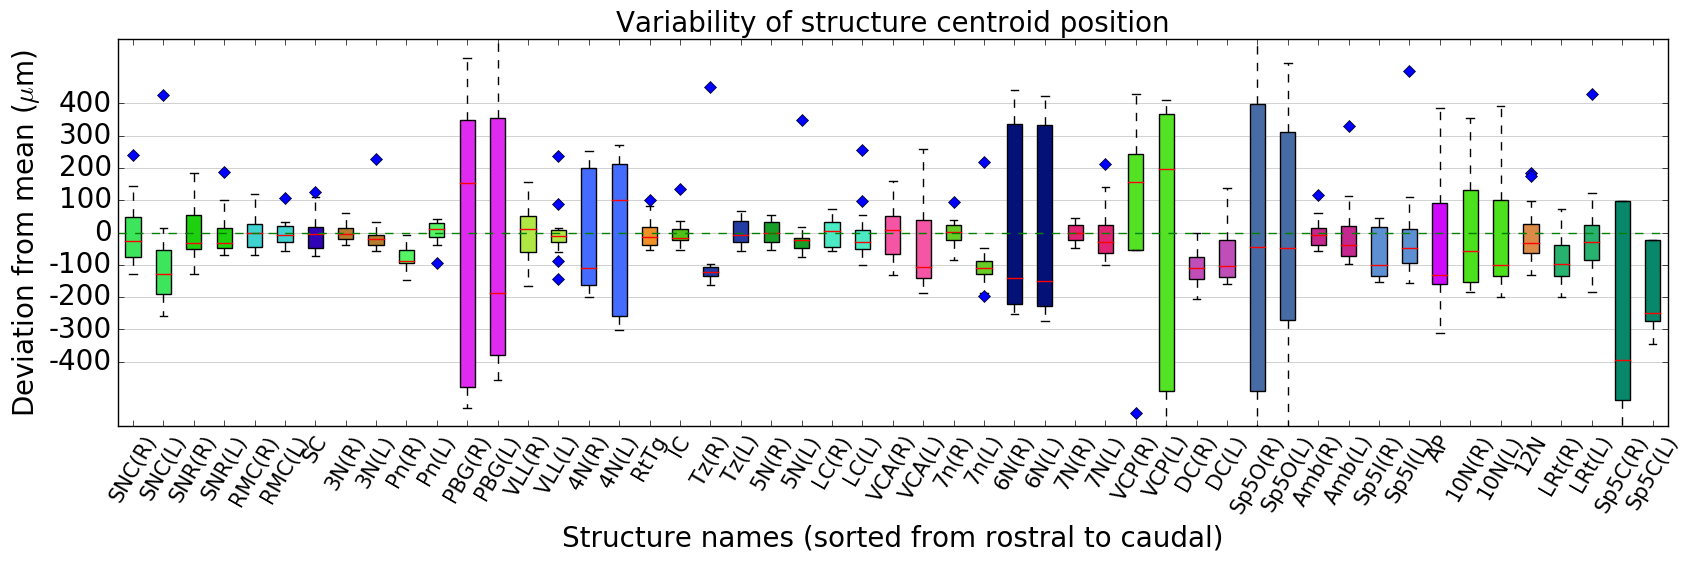

In [22]:
data = np.array([txyzs_allLandmarks_averaged[name] for name in structures_sided_sorted_by_x]).T

fig, ax = plt.subplots(1,1,figsize=(20,5))

# bplot = ax.boxplot(data, notch=False, sym='gD', vert=True, patch_artist=True, showfliers=True, whis=[5,95]);
bplot = ax.boxplot(data, notch=False, sym='gD', vert=True, patch_artist=True, showfliers=True, whis=1.5);

# fill with colors
for patch, name in zip(bplot['boxes'], structures_sided_sorted_by_x):
    patch.set_facecolor(names_to_color[name])

plt.setp(bplot['boxes'], ec='black')
plt.setp(bplot['whiskers'], color='black')

ax.set_ylim([-600, 600]);
ax.set_yticks(np.arange(-400, 500, 100));
ax.set_yticklabels(np.arange(-400, 500, 100), fontsize=20);
ax.set_ylabel('Deviation from mean ($\mu$m)', fontsize=20);

ax.set_title('Variability of structure centroid position', fontsize=20)

ax.set_xlabel('Structure names (sorted from rostral to caudal)', fontsize=20)
ax.set_xticks(1 + np.arange(len(structures_sided_sorted_by_x)))
ax.set_xticklabels(map(change_name_style, structures_sided_sorted_by_x), rotation='60', fontsize=15)
ax.axhline(0, color='g', ls='dashed')

ax.yaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)

# Hide these grid behind plot objects
ax.set_axisbelow(True)

plt.show();

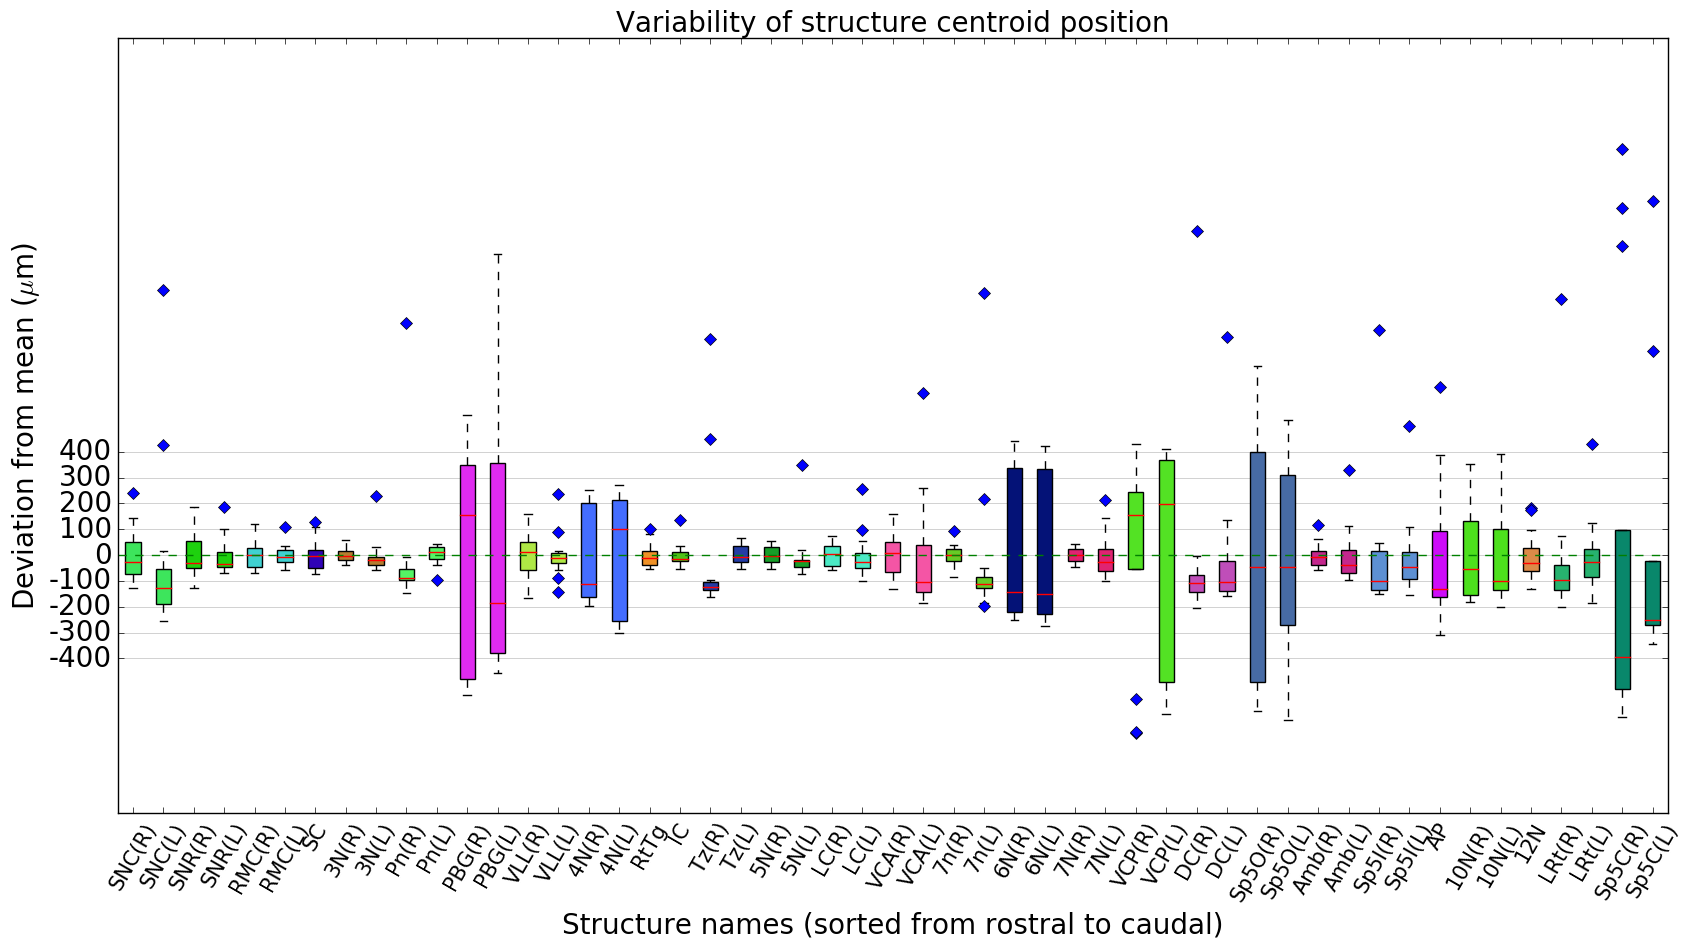

In [19]:
data = np.array([txyzs_allLandmarks_averaged[name] for name in structures_sided_sorted_by_x]).T

fig, ax = plt.subplots(1,1,figsize=(20,10))

# bplot = ax.boxplot(data, notch=False, sym='gD', vert=True, patch_artist=True, showfliers=True, whis=[5,95]);
bplot = ax.boxplot(data, notch=False, sym='gD', vert=True, patch_artist=True, showfliers=True, whis=1.5);

# fill with colors
for patch, name in zip(bplot['boxes'], structures_sided_sorted_by_x):
    patch.set_facecolor(names_to_color[name])

plt.setp(bplot['boxes'], ec='black')
plt.setp(bplot['whiskers'], color='black')

# ax.set_ylim([-600, 600]);
ax.set_yticks(np.arange(-400, 500, 100));
ax.set_yticklabels(np.arange(-400, 500, 100), fontsize=20);
ax.set_ylabel('Deviation from mean ($\mu$m)', fontsize=20);

ax.set_title('Variability of structure centroid position', fontsize=20)

ax.set_xlabel('Structure names (sorted from rostral to caudal)', fontsize=20)
ax.set_xticks(1 + np.arange(len(structures_sided_sorted_by_x)))
ax.set_xticklabels(map(change_name_style, structures_sided_sorted_by_x), rotation='60', fontsize=15)
ax.axhline(0, color='g', ls='dashed')

ax.yaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)

# Hide these grid behind plot objects
ax.set_axisbelow(True)

plt.show();

In [52]:
structures_sided_sorted_by_x_handPicked = ['SNC_R',
 'SNC_L',
 'SNR_R',
 'SNR_L',
 'RMC_R',
 'RMC_L',
 'SC',
 '3N_R',
 '3N_L',
 'Pn_R',
 'Pn_L',
 'VLL_R',
 'VLL_L',
 'RtTg',
 'IC',
 'Tz_R',
 'Tz_L',
 '5N_R',
 '5N_L',
 'LC_R',
 'LC_L',
 'VCA_R',
 'VCA_L',
 '7n_R',
 '7n_L',
 '7N_R',
 '7N_L',
 'DC_R',
 'DC_L',
 'Amb_R',
 'Amb_L',
 'Sp5I_R',
 'Sp5I_L',
 'AP',
 '10N_R',
 '10N_L',
 '12N',
 'LRt_R',
 'LRt_L',
 'Sp5C_R',
 'Sp5C_L']

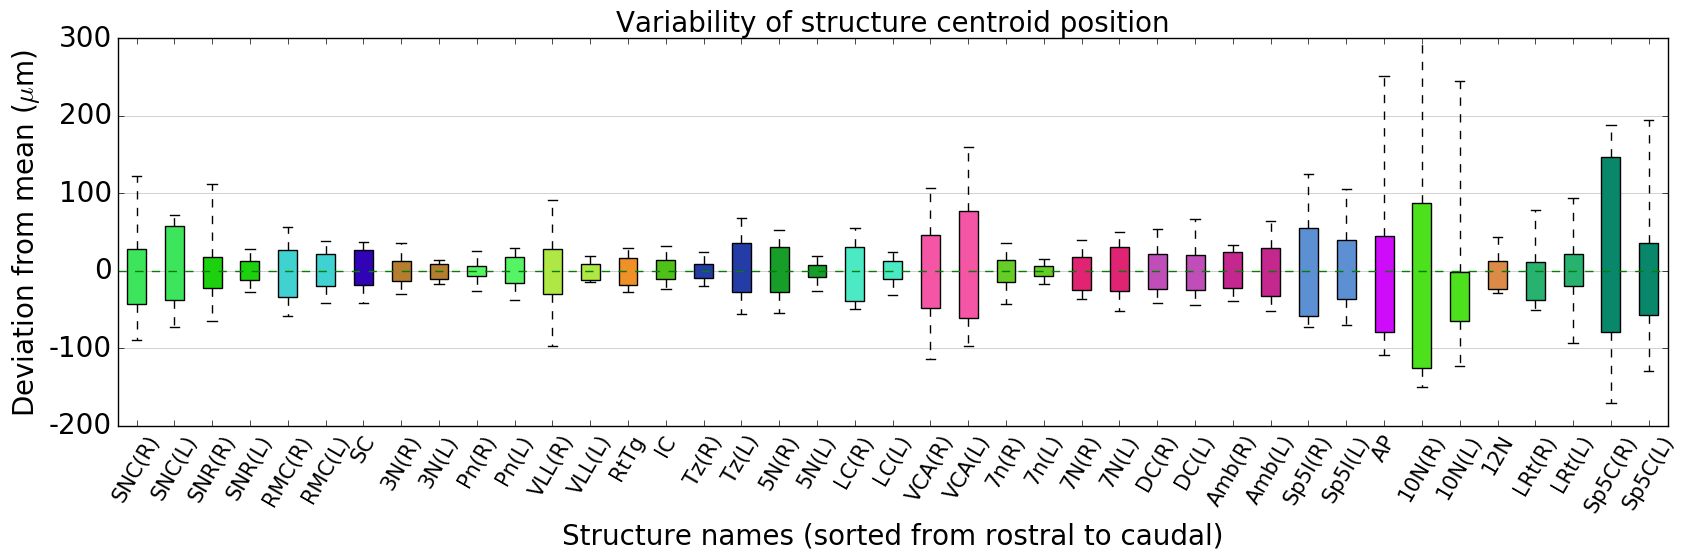

In [61]:
data = np.array([txyzs_allLandmarks_outlierRemoved_averaged[name] for name in structures_sided_sorted_by_x_handPicked]).T

fig, ax = plt.subplots(1,1,figsize=(20,5))

bplot = ax.boxplot(data, notch=False, sym='gD', vert=True, patch_artist=True, showfliers=True, whis=(0,100),
                  medianprops=dict(linewidth=0));

# fill with colors
for patch, name in zip(bplot['boxes'], structures_sided_sorted_by_x_handPicked):
    patch.set_facecolor(names_to_color[name])

plt.setp(bplot['boxes'], ec='black')
plt.setp(bplot['whiskers'], color='black')

ax.set_ylim([-200, 300]);
ax.set_yticks(np.arange(-200, 400, 100));
ax.set_yticklabels(np.arange(-200, 400, 100), fontsize=20);
ax.set_ylabel('Deviation from mean ($\mu$m)', fontsize=20);

ax.set_title('Variability of structure centroid position', fontsize=20)

ax.set_xlabel('Structure names (sorted from rostral to caudal)', fontsize=20)
ax.set_xticks(1 + np.arange(len(structures_sided_sorted_by_x_handPicked)))
ax.set_xticklabels(map(change_name_style, structures_sided_sorted_by_x_handPicked), rotation='60', fontsize=15)
ax.axhline(0, color='g', ls='dashed')

ax.yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)

# Hide these grid behind plot objects
ax.set_axisbelow(True)

plt.show();

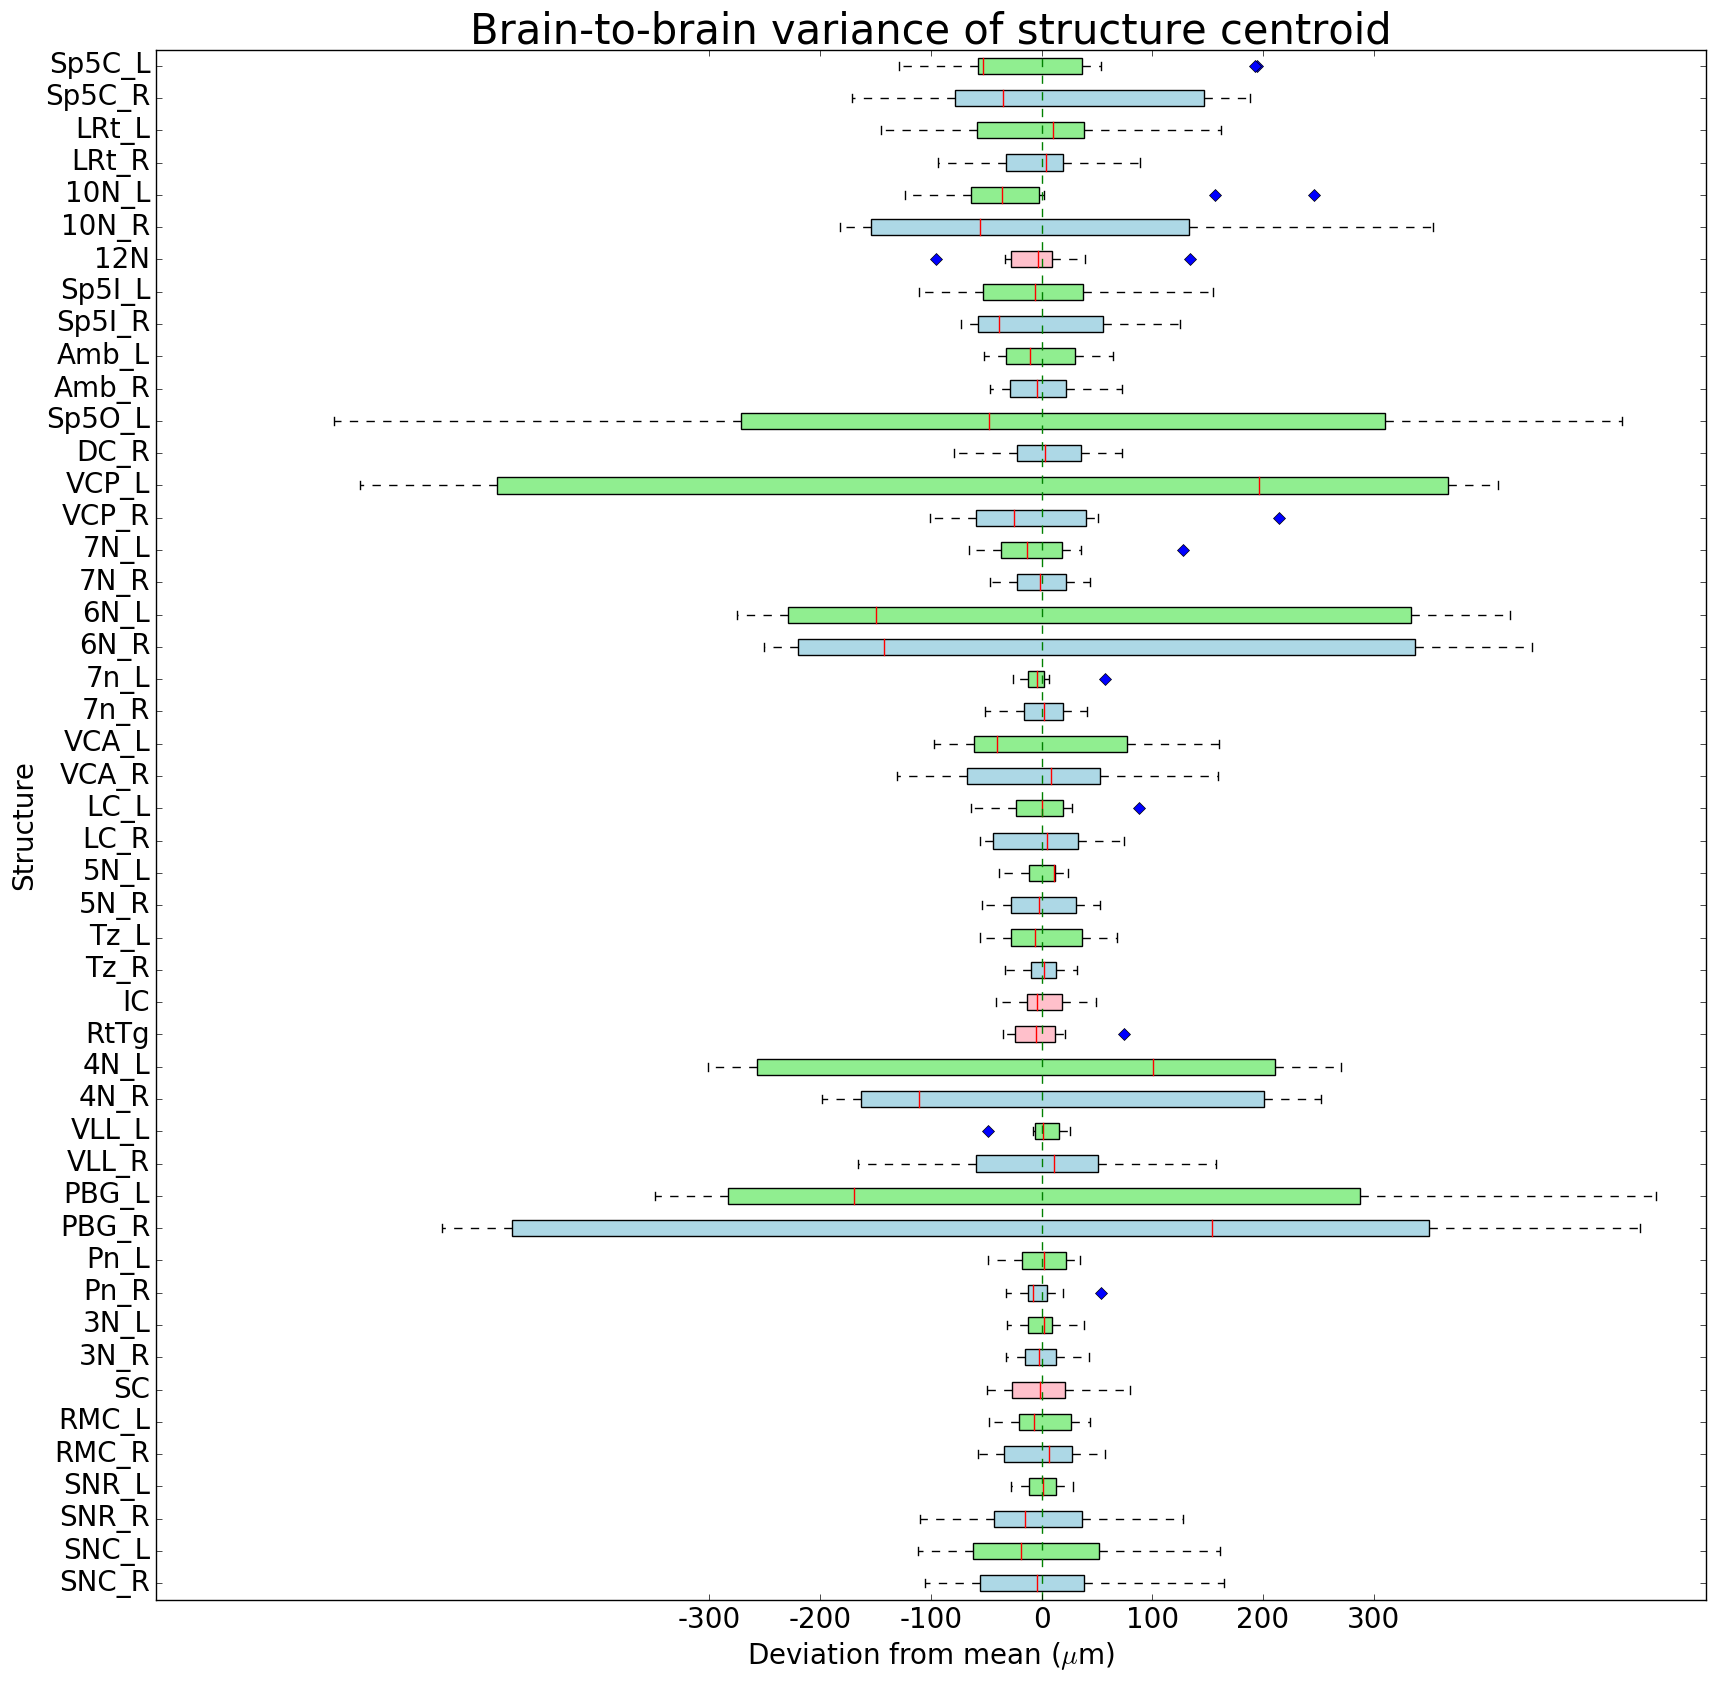

In [52]:
data = np.array([txyzs_allLandmarks_averaged[name] for name in structures_sided_sorted_by_x]).T

fig, ax = plt.subplots(1,1,figsize=(20,20))

bplot = ax.boxplot(data, notch=False, sym='gD', vert=False, patch_artist=True);
#     axes[i].set_xlim([-300, 300])

# fill with colors
for patch, name in zip(bplot['boxes'], structures_sided_sorted_by_x):
    if name.endswith('R'):
        patch.set_facecolor('lightblue')
    elif name.endswith('L'):
        patch.set_facecolor('lightgreen')
    else:
        patch.set_facecolor('pink')
        
plt.setp(bplot['boxes'], ec='black')
plt.setp(bplot['whiskers'], color='black')
plt.setp(bplot['means'], ec='black')

ax.set_xticks(np.arange(-300, 400, 100));
ax.set_xticklabels(np.arange(-300, 400, 100), fontsize=20);
ax.set_xlabel('Deviation from mean ($\mu$m)', fontsize=20);

ax.set_title('Brain-to-brain variance of structure centroid', fontsize=30)

ax.set_ylabel('Structure', fontsize=20)
ax.set_yticks(1 + np.arange(len(structures_sided_sorted_by_x)))
ax.set_yticklabels(structures_sided_sorted_by_x, rotation='0', fontsize=20)
ax.axvline(0, color='g', ls='dashed')
plt.show();

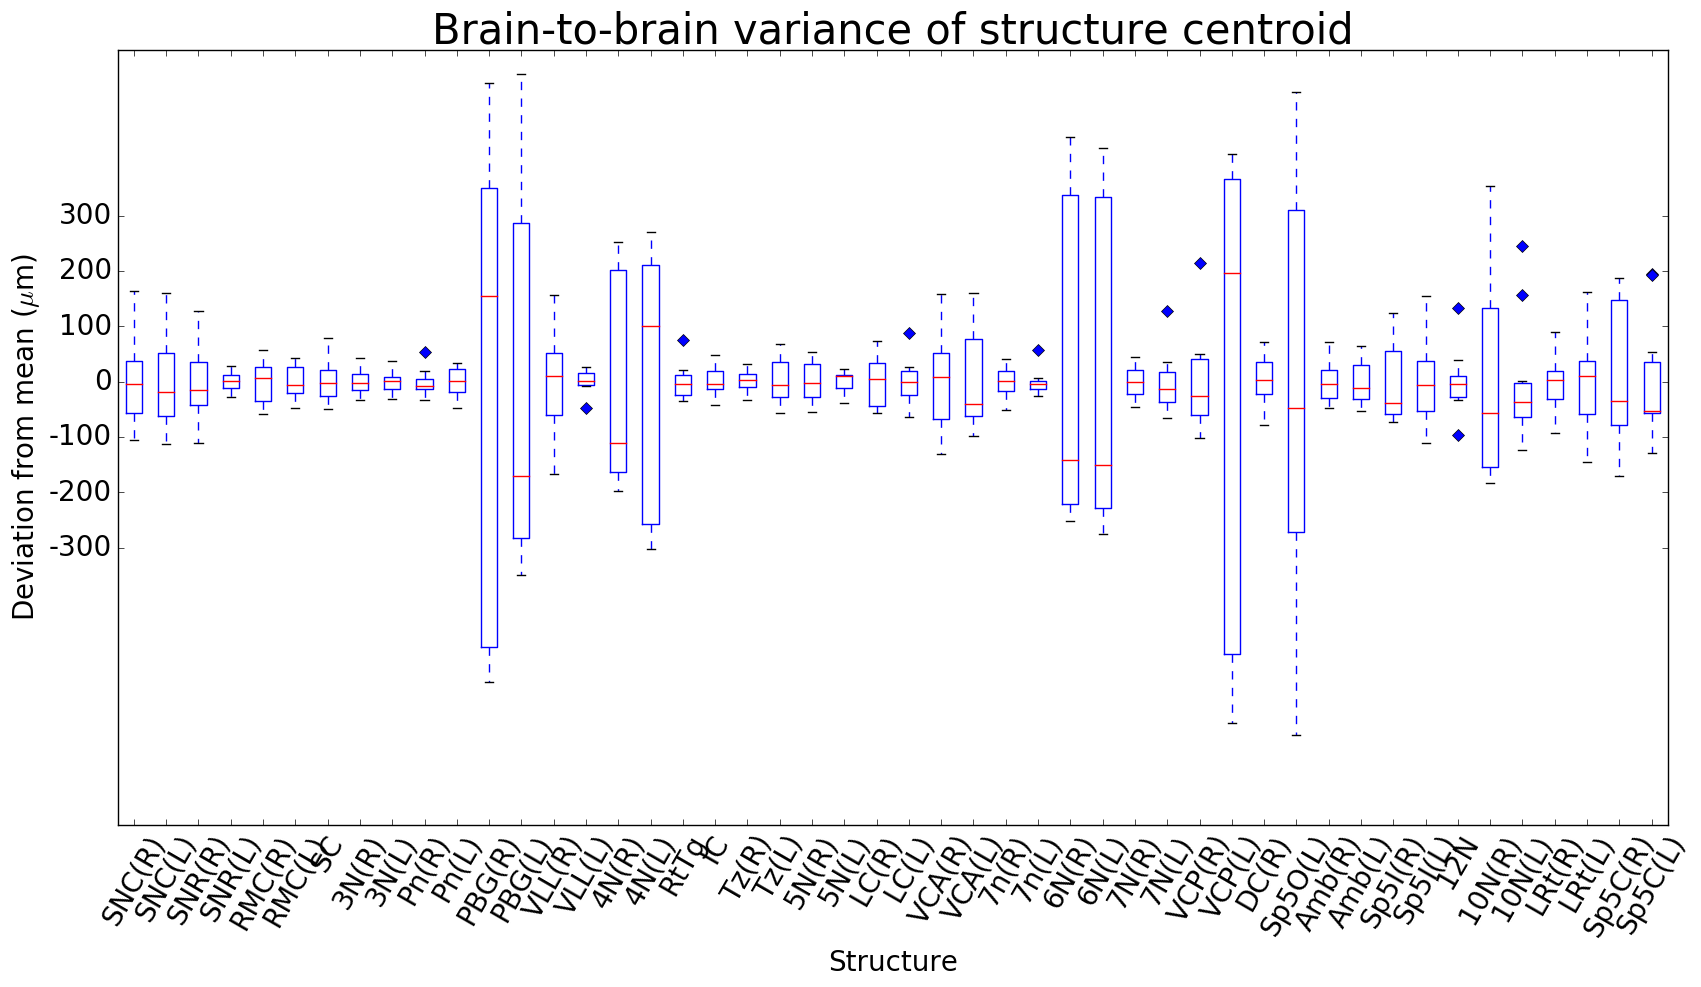

In [17]:
# fig, axes = plt.subplots(3, 1, figsize=(20,40), squeeze=True)

axes = [None for _ in range(4)]

# for i, (d, v) in enumerate(zip([txs_allLandmarks, tys_allLandmarks, tzs_allLandmarks], ['tx', 'ty', 'tz'])):
# for i, (d, v) in enumerate(zip([txs_allLandmarks_averaged, tys_allLandmarks_averaged, tzs_allLandmarks_averaged, txyzs_allLandmarks_averaged], 
#                                ['tx', 'ty', 'tz', 't'])):
for i, (d, v) in enumerate(zip([txyzs_allLandmarks_averaged], ['t'])):

#     names = sorted(d.keys())
    data = np.array([d[name] for name in structures_sided_sorted_by_x]).T

    fig, axes[i] = plt.subplots(1,1,figsize=(20,10))
    
    axes[i].boxplot(data, 0, 'gD');
#     axes[i].set_ylim([-300, 300])
    axes[i].set_yticks(np.arange(-300, 400, 100));
    axes[i].set_yticklabels(np.arange(-300, 400, 100), fontsize=20);
    axes[i].set_ylabel('Deviation from mean ($\mu$m)', fontsize=20);
    direction = ''
    axes[i].set_title('Brain-to-brain variance of structure centroid', fontsize=30)
    
    axes[i].set_xlabel('Structure', fontsize=20)
    axes[i].set_xticks(1 + np.arange(len(names2_sorted_by_x)))
    axes[i].set_xticklabels(names2_sorted_by_x, rotation='60', fontsize=20)
#     axes[i].axvline(0, color='g', ls='dashed')
    plt.show();
    
# plt.setp(axes, xticks=range(1, 1+data.shape[1]), xticklabels=names)
# plt.tight_layout(h_pad=5.0);
# plt.show();

# Old

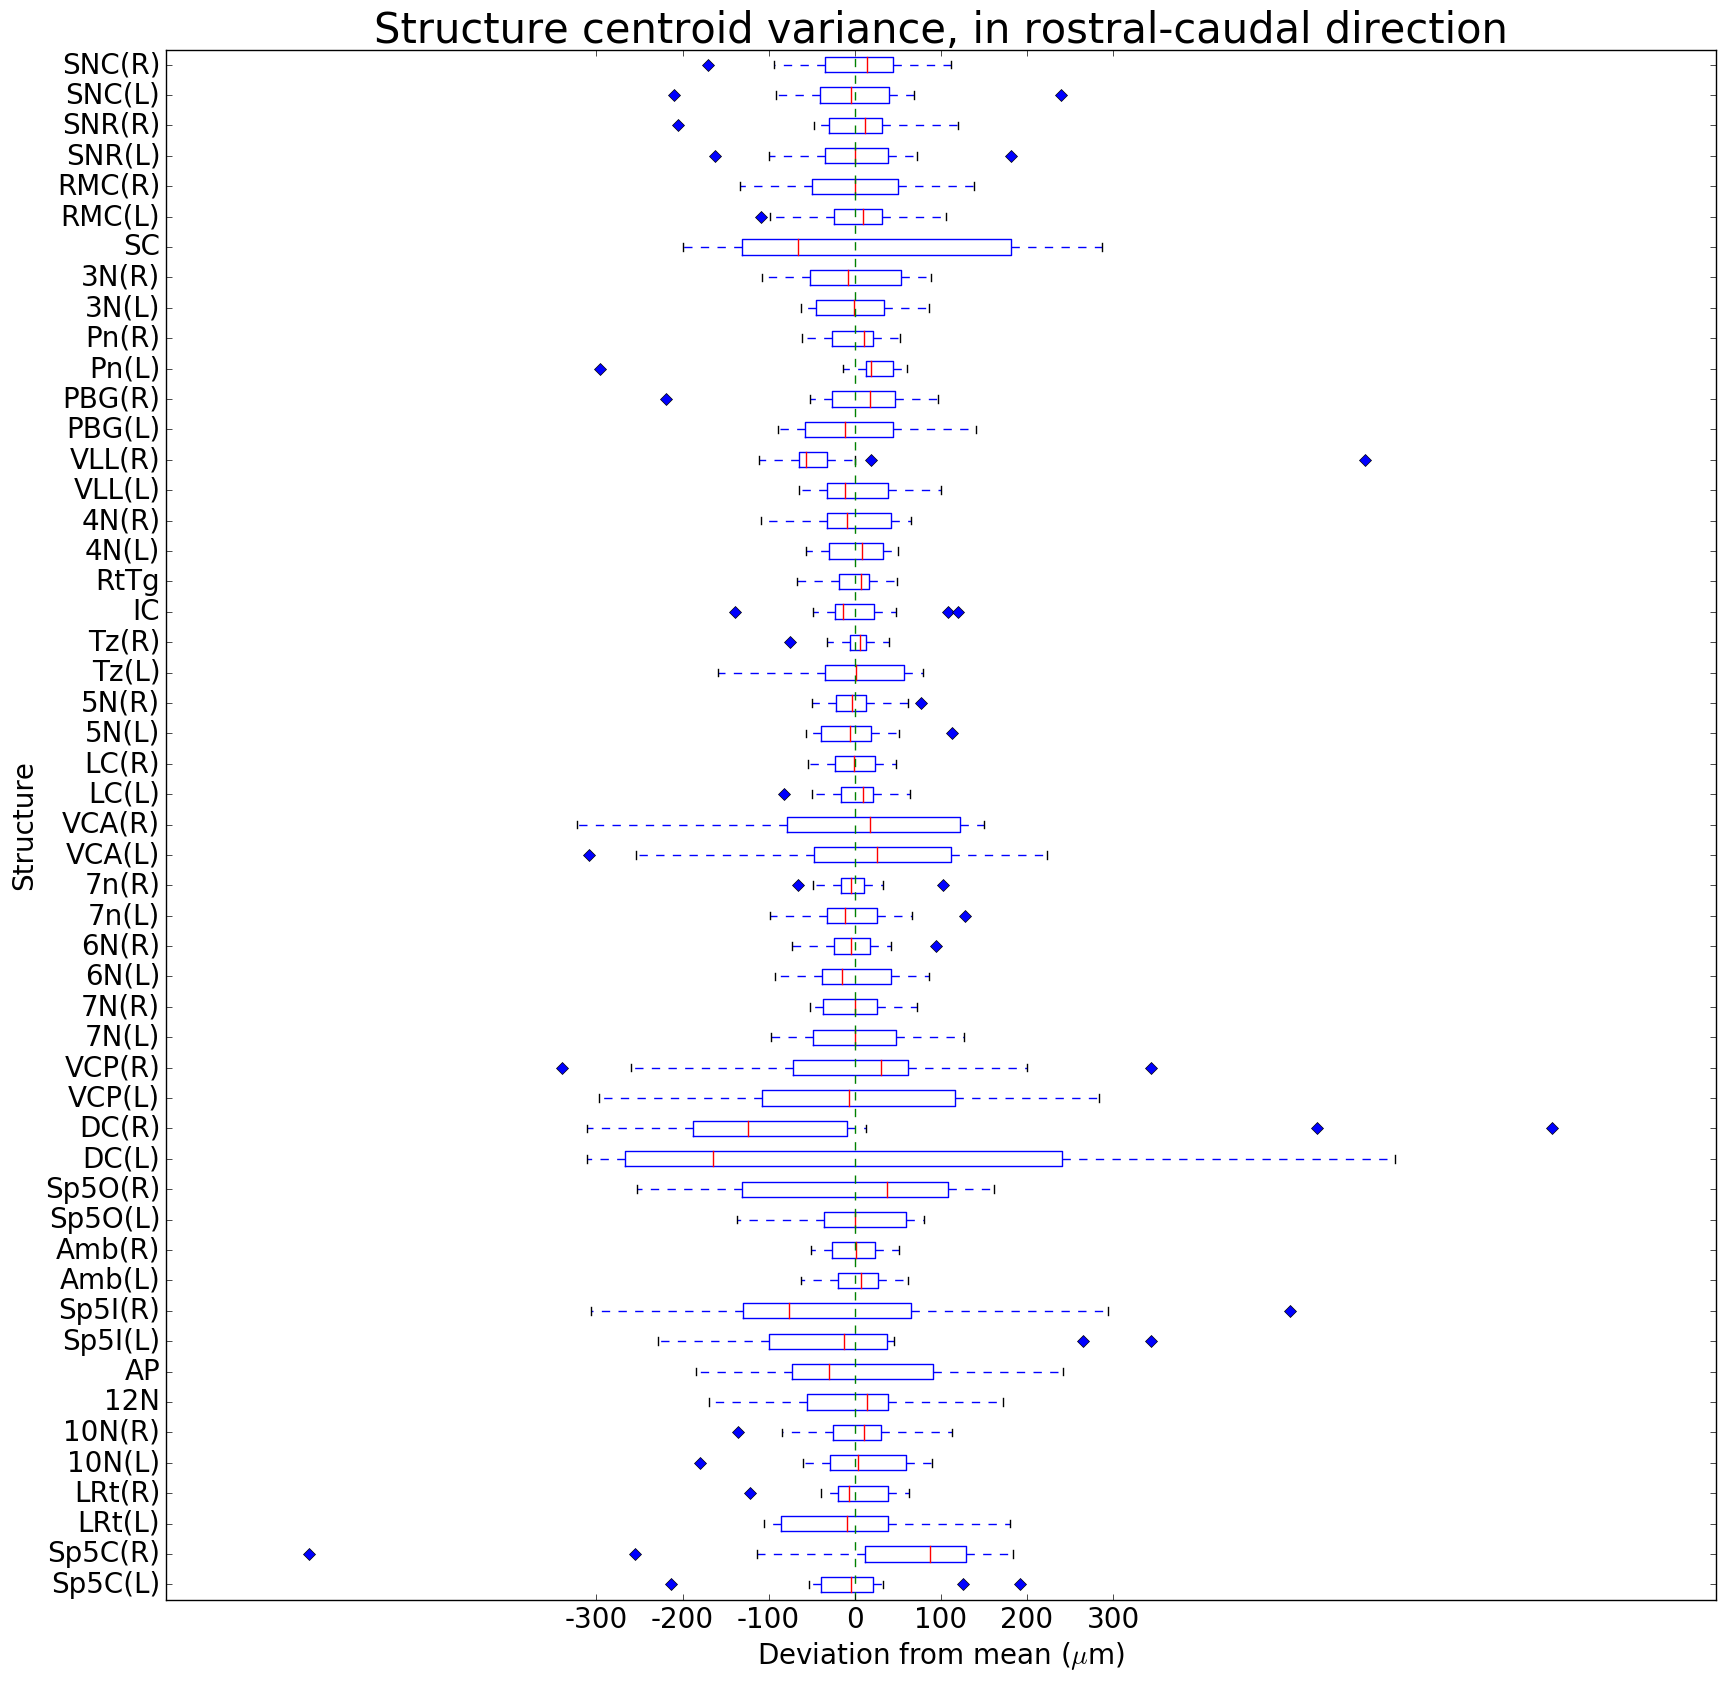

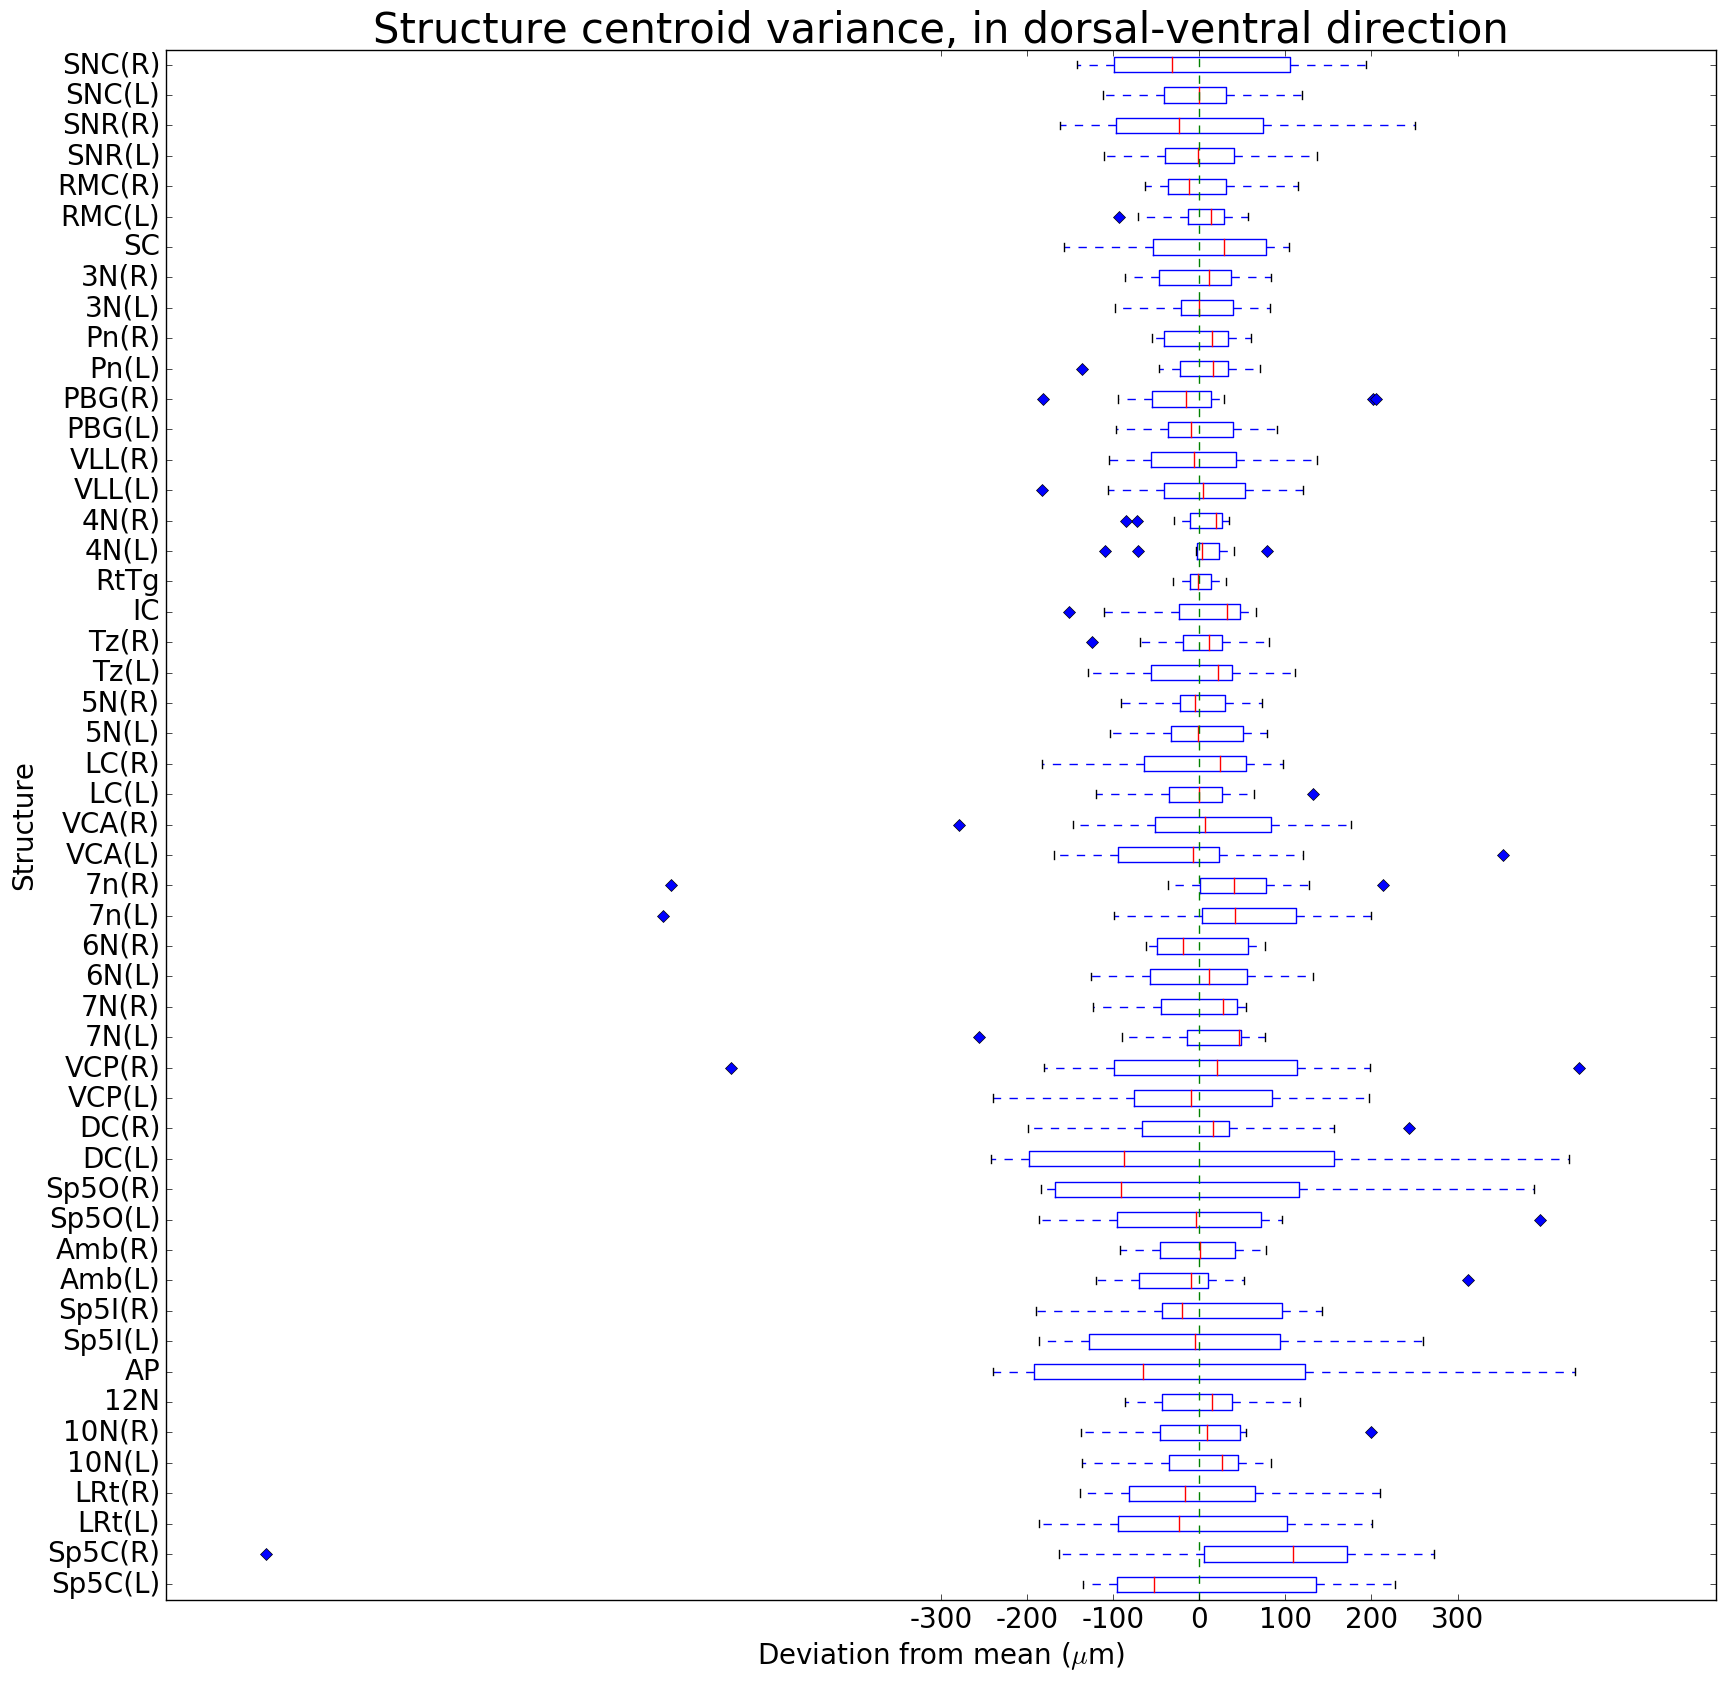

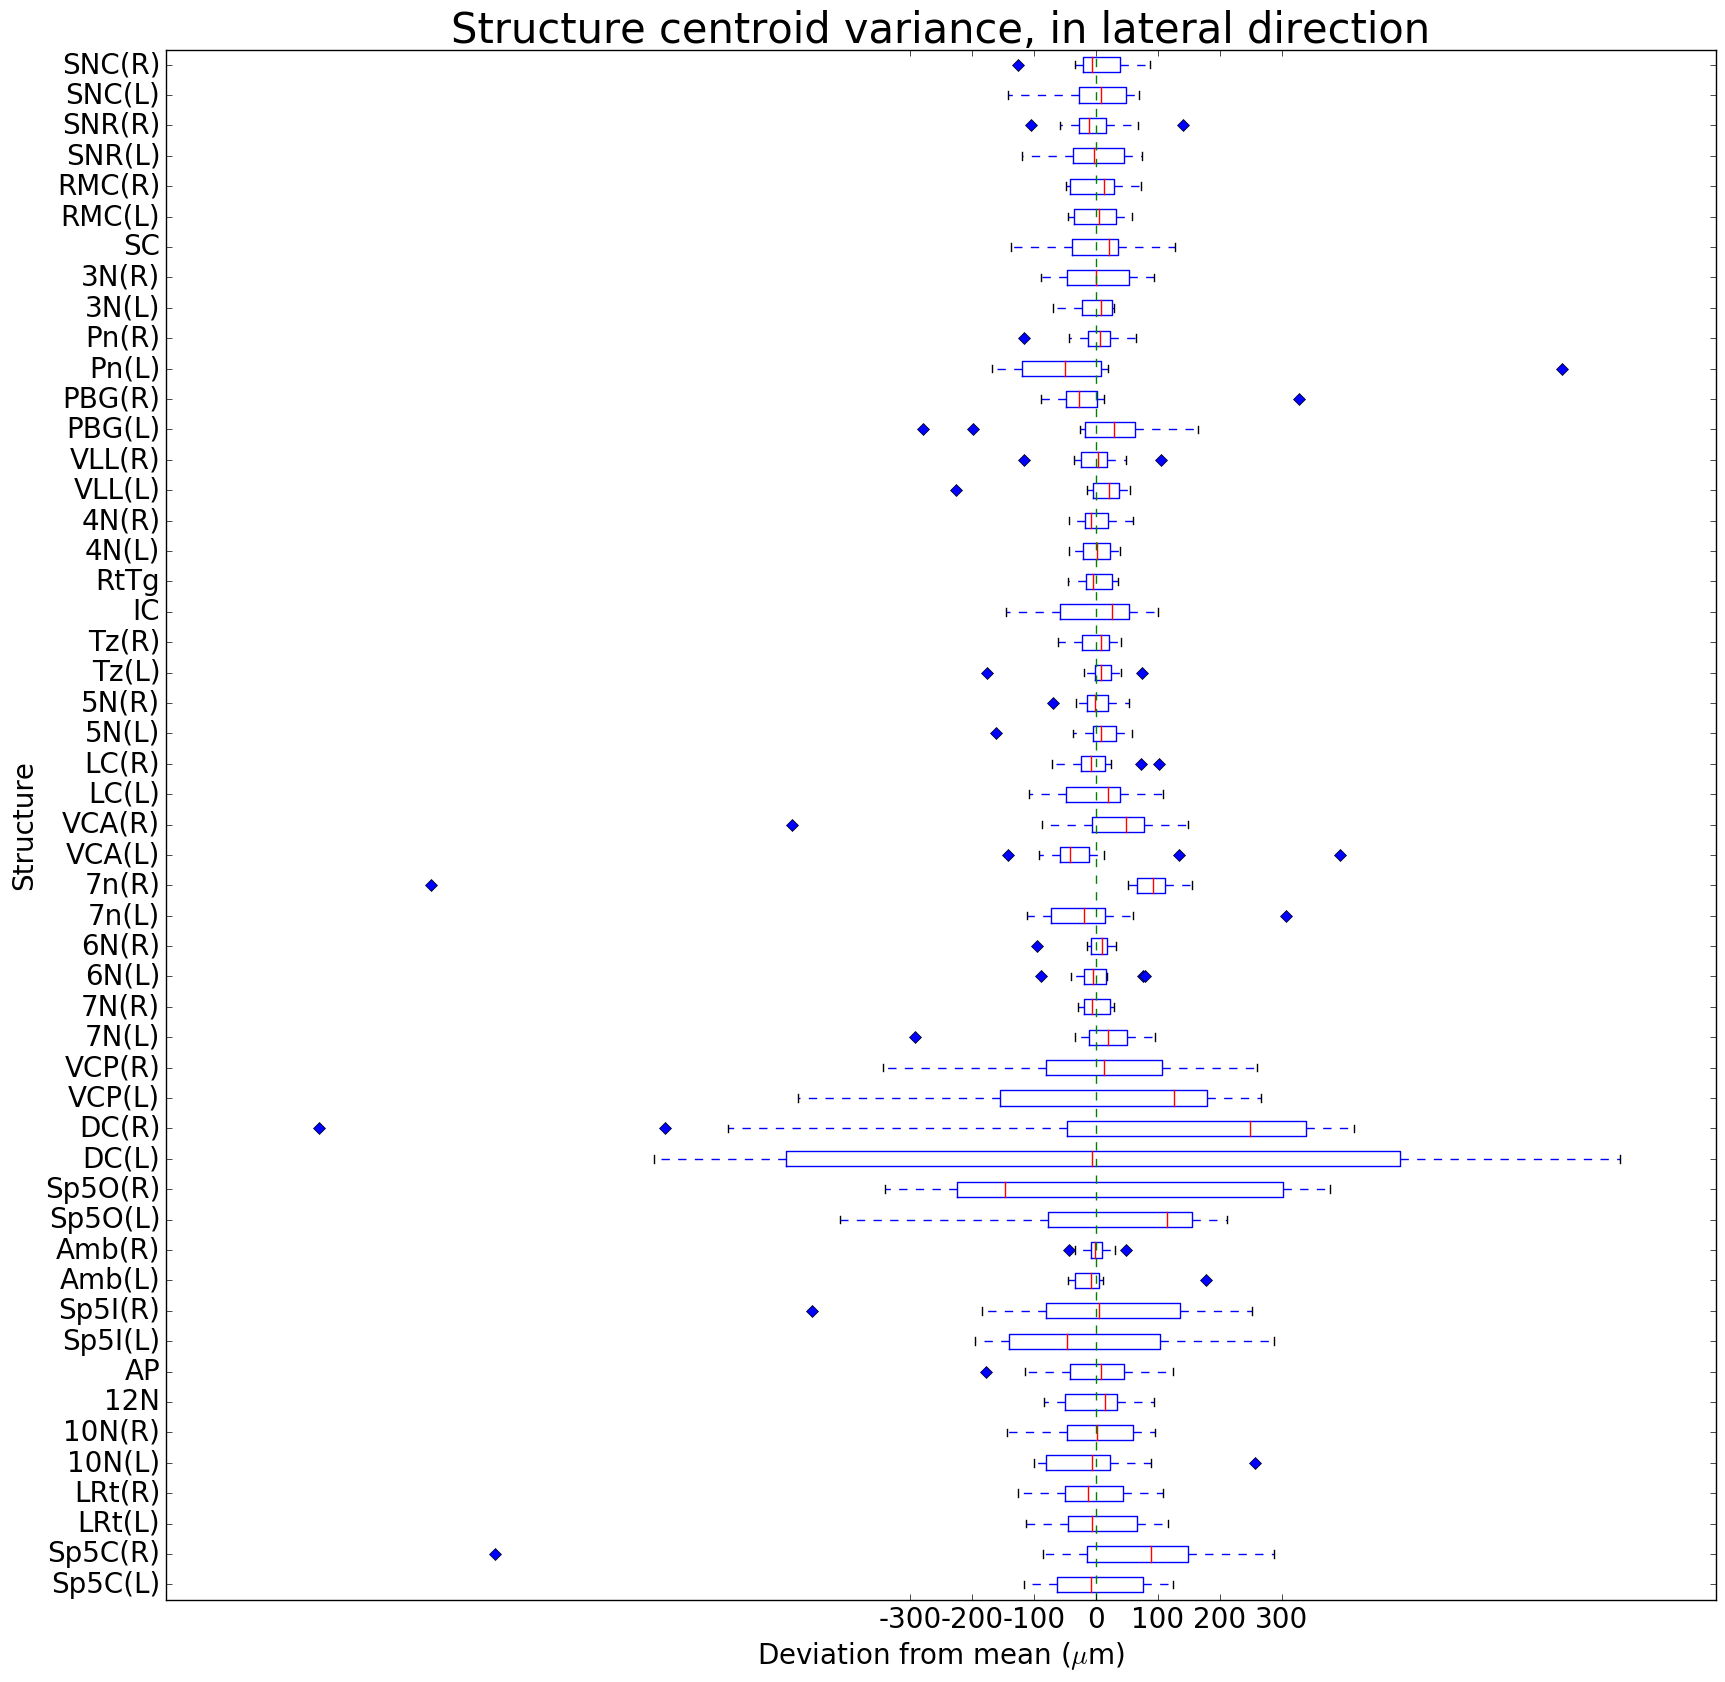

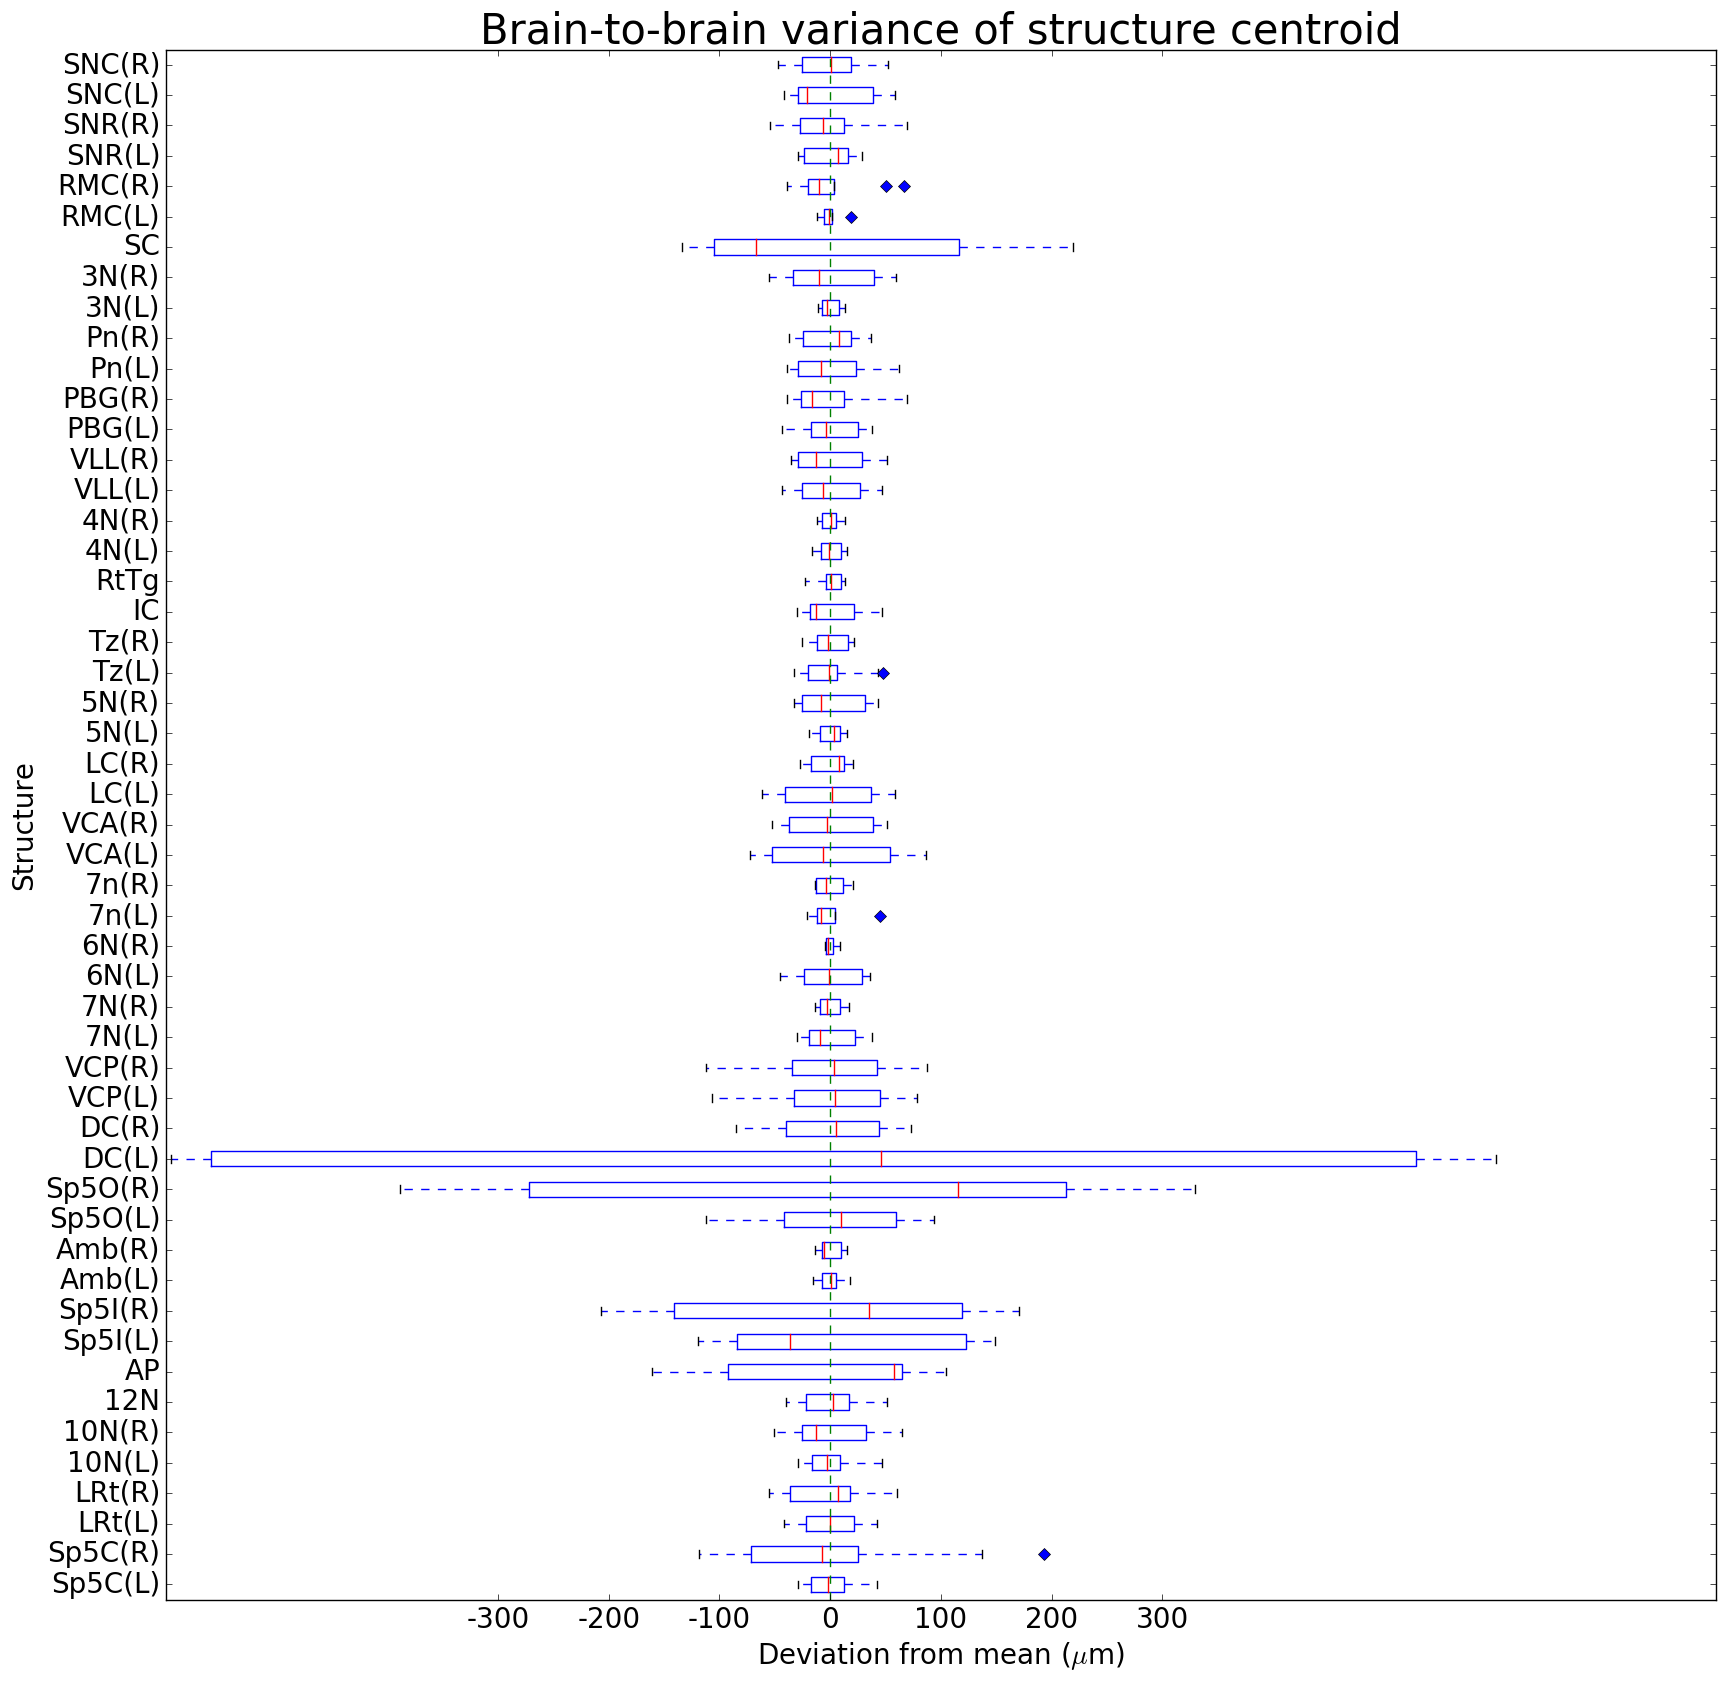

In [123]:
# fig, axes = plt.subplots(3, 1, figsize=(20,40), squeeze=True)

axes = [None for _ in range(4)]

# for i, (d, v) in enumerate(zip([txs_allLandmarks, tys_allLandmarks, tzs_allLandmarks], ['tx', 'ty', 'tz'])):
for i, (d, v) in enumerate(zip([txs_allLandmarks_averaged, tys_allLandmarks_averaged, tzs_allLandmarks_averaged, txyzs_allLandmarks_averaged], 
                               ['tx', 'ty', 'tz', 't'])):

#     names = sorted(d.keys())
    data = np.array([d[name] for name in structures_sided_sorted_by_x[::-1]]).T

    fig, axes[i] = plt.subplots(1,1,figsize=(20,20))
    
    axes[i].boxplot(data, 0, 'gD', 0);
#     axes[i].set_xlim([-300, 300])
    axes[i].set_xticks(np.arange(-300, 400, 100));
    axes[i].set_xticklabels(np.arange(-300, 400, 100), fontsize=20);
    axes[i].set_xlabel('Deviation from mean ($\mu$m)', fontsize=20);
    if v == 'tx':
        direction = 'rostral-caudal'
        axes[i].set_title('Structure centroid variance, in %s direction' % direction, fontsize=30)
    elif v == 'ty':
        direction = 'dorsal-ventral'
        axes[i].set_title('Structure centroid variance, in %s direction' % direction, fontsize=30)
    elif v == 'tz':
        direction = 'lateral'
        axes[i].set_title('Structure centroid variance, in %s direction' % direction, fontsize=30)
    elif v == 't':
        direction = ''
        axes[i].set_title('Brain-to-brain variance of structure centroid', fontsize=30)
        
    
    axes[i].set_ylabel('Structure', fontsize=20)
    axes[i].set_yticks(1 + np.arange(len(names2_sorted_by_x)))
    axes[i].set_yticklabels(names2_sorted_by_x[::-1], rotation='0', fontsize=20)
    axes[i].axvline(0, color='g', ls='dashed')
    plt.show();
    
    
# plt.setp(axes, xticks=range(1, 1+data.shape[1]), xticklabels=names)
# plt.tight_layout(h_pad=5.0);
# plt.show();